# Problem Statement:
Forecast the CocaCola prices . Prepare a document for each model explaining   
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

# What is actually Time Series forecasting?
 forecasting is nothing but predicting future values over future perios of time

In [413]:
# import the basic libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [414]:
# import the data set
df=pd.read_excel("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 18- FORECASTING/CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# Data Exploration

In [415]:
df.shape

(42, 2)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [417]:
# cheking for missing values 
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

No missing data found in dataset , in time series forecasting there should not be any missing values in data.

In [418]:
# checking for duplicated data 
df[df.duplicated()]

,Quarter,Sales


No duplicate data found.

In [419]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


# Feature Engineering

## Converting the data of quarter into Years

In [420]:
df['Quarter_year']=df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
df.head()

,Quarter,Sales,Quarter_year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [421]:
df['Date']=(
        pd.to_datetime(
        df['Quarter_year'].str.split(' ').apply(lambda x:''.join(x[::-1])),
        dayfirst=True))
df.head()

,Quarter,Sales,Quarter_year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [422]:
# Placing the Quarter into seperate columns
df['Quarters']=df['Quarter'].str.split('_').apply(lambda x:''.join(x[::2])) #default start index, default stop index, step size is two
df.head()

,Quarter,Sales,Quarter_year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


### 

# Creating dummy variables

In [423]:
dummy=pd.DataFrame(pd.get_dummies(df['Quarters']))
dummy.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [424]:
df1=pd.concat((df,dummy),axis=1)
df1.head()

,Quarter,Sales,Quarter_year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


## Dropping unneccesary columns

In [425]:
df1.drop(['Quarter','Quarter_year'],axis=1,inplace=True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


## Making the data as time index


In [426]:
df1.set_index('Date',inplace=True)
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


### Seperating Month and Year into seperate columns for visualisation

In [427]:
df['Date']=pd.to_datetime(df.Date,format='%b-%y')
df['Month']=df.Date.dt.strftime('%b')
df['Year']=df.Date.dt.strftime('%Y')
df.head(10)

,Quarter,Sales,Quarter_year,Date,Quarters,Month,Year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


# Visualization

In [428]:
Sale_heatamp=pd.pivot_table(data=df,values='Sales',index='Year',columns='Month',aggfunc='mean',fill_value=0)
Sale_heatamp

Month,Apr,Jan,Jul,Oct
Year,,,,
1986,2244.960999,1734.827000,2533.804993,2154.962997
1987,2104.411995,1547.818996,2014.362999,1991.746998
1988,2313.631996,1869.049999,2128.320000,2026.828999
1989,2331.164993,1910.603996,2206.549995,2173.967995
1990,2739.307999,2148.278000,2792.753998,2556.009995
1991,3039.522995,2480.973999,3172.115997,2879.000999
1992,3550.000000,2772.000000,3508.000000,3243.859993
1993,3899.000000,3056.000000,3629.000000,3373.000000
1994,4342.000000,3352.000000,4461.000000,4017.000000


<AxesSubplot:xlabel='Month', ylabel='Year'>

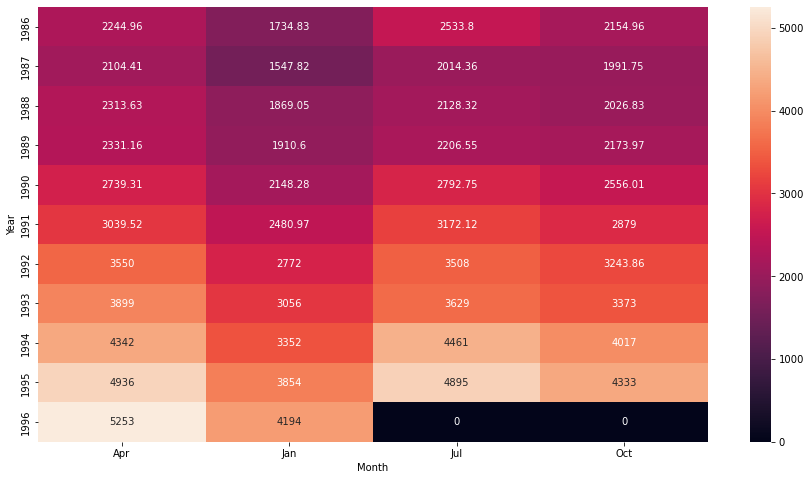

In [429]:
plt.figure(figsize=(15,8))
sns.heatmap(Sale_heatamp,annot=True,fmt='g')

<AxesSubplot:xlabel='Date'>

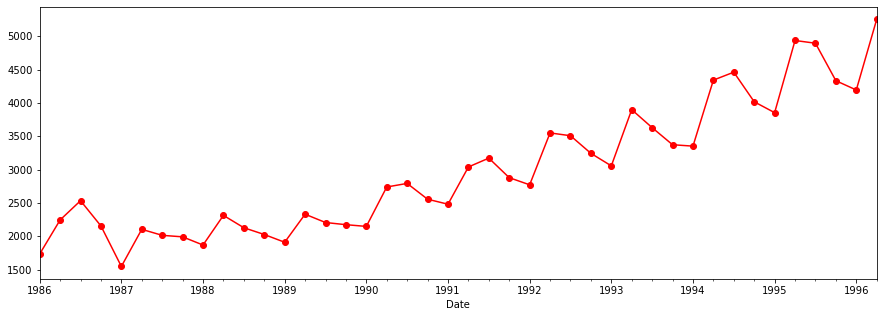

In [430]:
plt.figure(figsize=(15,5))
df1['Sales'].plot(color='red',marker='o')

### Observations:
1. we can see here upward trend in data
2. varience is not constat hence data is not stationary

## Stationary Vs Non Stationary series
A time series whose statistical properties, such as mean, variance, etc., remain constant over time, are called a stationary time series.  
A time series whose statistical properties change over time is called a non-stationary time series. Thus a time series with a trend or seasonality is non-stationary in nature. This is because the presence of trend or seasonality will affect the mean, variance and other properties at any given point in tim

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

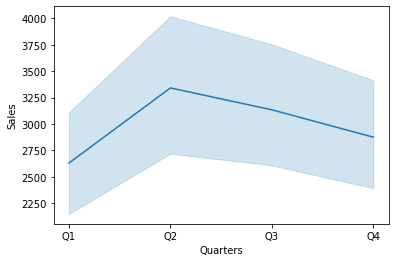

In [431]:
sns.lineplot(x="Quarters",y='Sales',data=df1)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

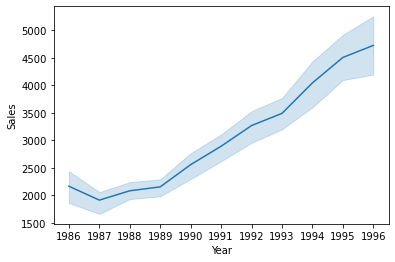

In [432]:
sns.lineplot(x="Year",y='Sales',data=df)

Sale has upward trend, sale of company increased over the year

<AxesSubplot:xlabel='Year', ylabel='Sales'>

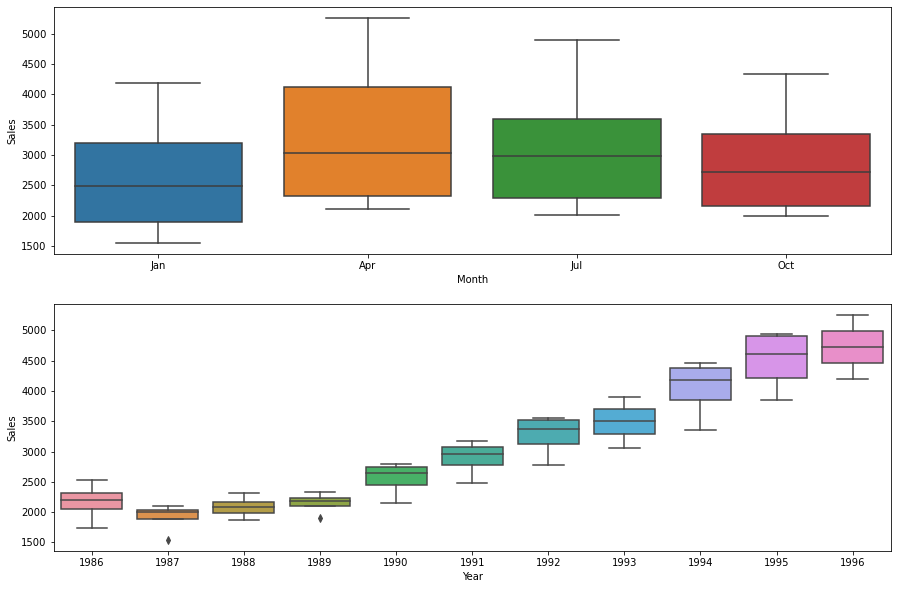

In [433]:
#Boxplot for year and month
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x='Month',y='Sales',data=df)
plt.subplot(212)
sns.boxplot(x='Year',y='Sales',data=df)

# Lag-Plot
A lag plot is a special type of scatter plot in which the X-axis represents the dataset with some time units behind or ahead as compared to the Y-axis. The difference between these time units is called lag or lagged and it is represented by k.  

### The lag plot contains the following axes:

Vertical axis: Yi for all i  
Horizontal axis: Yi-k for all i, where k is lag value  
The lag plot is used to answer the following questions:  

#### Distribution of Model: 
Distribution of model here means deciding what is the shape of data on the basis of the lag plot. Below are some examples of lag plot and their original plot:

1. If the lag plot is linear, then the underlying structure is of the autoregressive model.
2. If the lag plot is of elliptical shape, then the underlying structure represents a continuous periodic function such as sine, cosine, etc.

#### Outliers: 
Outliers are a set of data points that represent the extreme values in the distribution

#### Randomness in data:
The lag plot is also useful for checking whether the given dataset is random or not. If there is randomness in the data then it will be reflected in the lag plot, if there is no pattern in the lag plot.

#### Seasonality: 
If there is seasonality in the plot then, it will give a periodic lag plot.

#### Autocorrelation: 
1. If the lag plot gives a linear plot, then it means the autocorrelation is present in the data, whether there is positive autocorrelation or negative that depends upon the slope of the line of the dataset.
2. If more data is concentrated on the diagonal in lag plot, it means there is a strong autocorrelation.


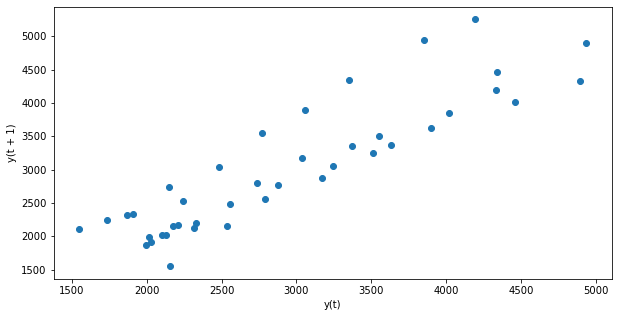

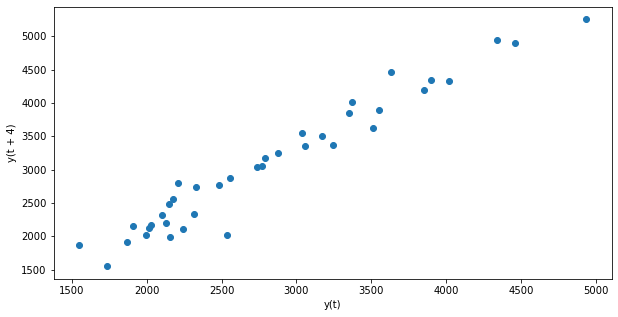

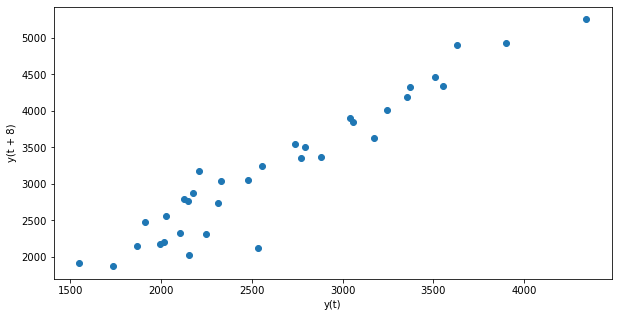

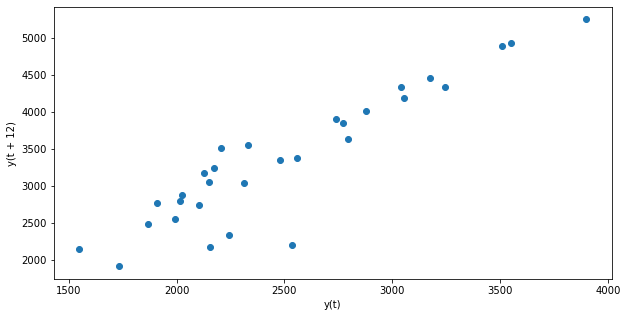

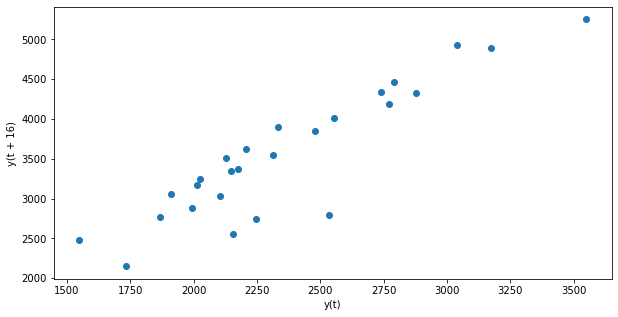

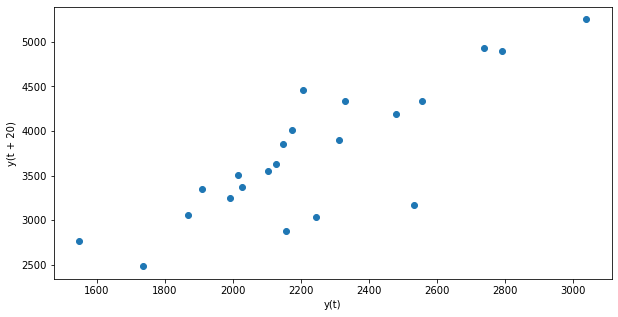

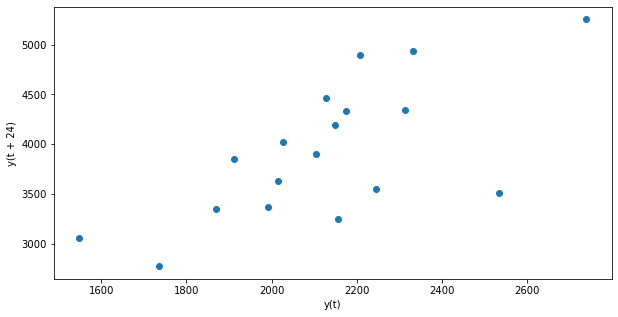

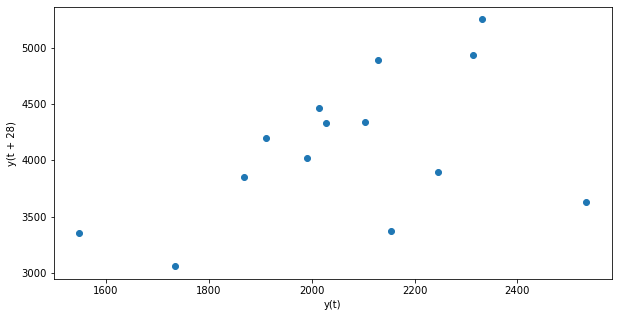

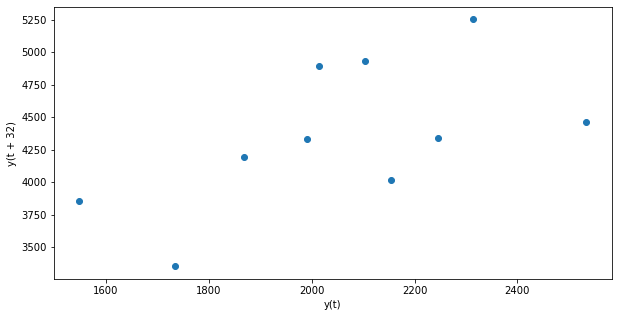

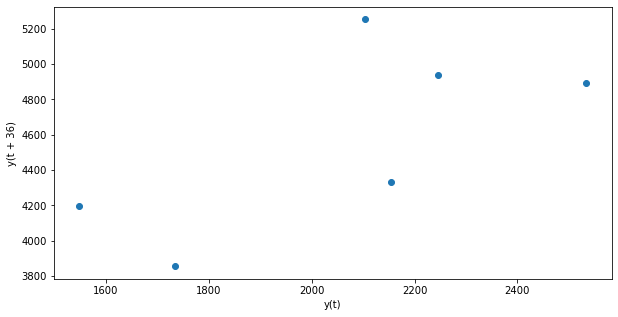

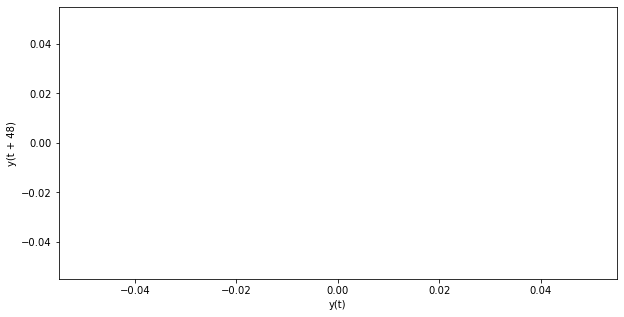

In [434]:
# plot lag plot
from pandas.plotting import lag_plot
for i in (1,4,8,12,16,20,24,28,32,36,48):
    plt.figure(figsize=(10,5))
    lag_plot(df.Sales, lag=i)
    plt.show()

# Finding Moving average various window size

# Moving Average
1. Moving average refers to a series of averages of fixed size subsets of the total set of observations. It is also known as rolling average, running average, rolling means or running average.

2. Consider the set of n observations and k be the size of the window for determining the average at any time t. Then moving average list is calculated by initially taking the average of the first k observations present in the current window and storing it in the list. Now, the window is expanded according to the condition of the moving average to be determined and again average of the elements present in the window is calculated and stored in the list. This process is continued until the window has reached the end of the set. 

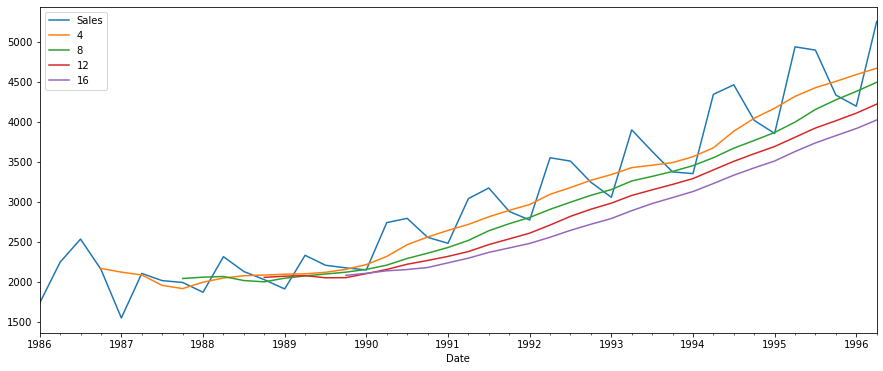

In [435]:
plt.figure(figsize=(15,6))
df1['Sales'].plot()
for i in range(4,20,4):
    df1['Sales'].rolling(i).mean().plot(label=i)   # rolling average = moving average
plt.legend(loc='best')

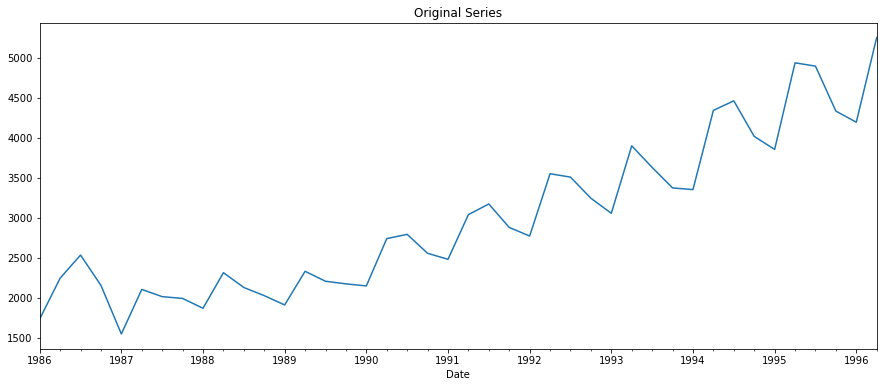

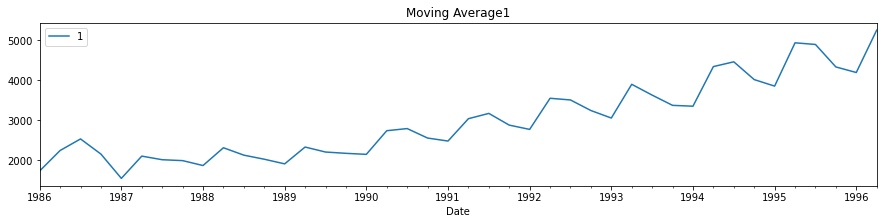

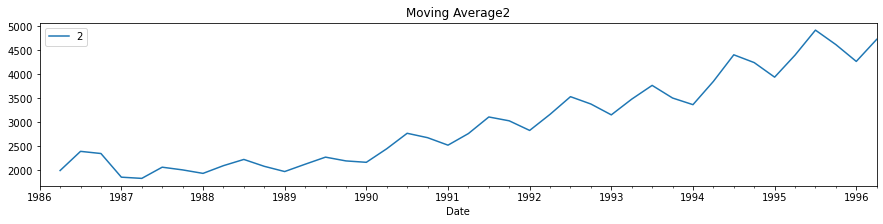

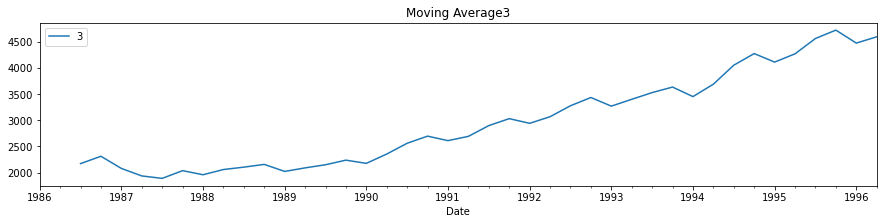

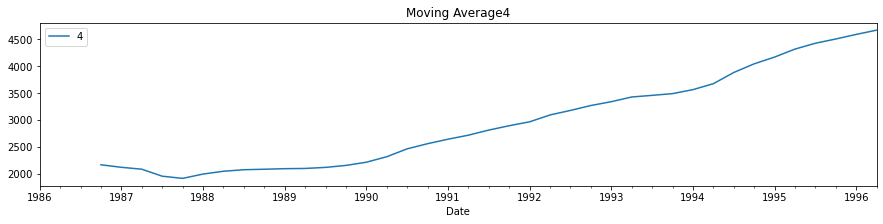

In [436]:
plt.figure(figsize=(15,6))
df1['Sales'].plot()
plt.title('Original Series')
for i in range(1,5):
    plt.figure(figsize=(15,3))
    df1['Sales'].rolling(i).mean().plot(label=(i))
    plt.title('Moving Average' +str(i))
    plt.legend(loc='best')
    
    

with the window size 4 moving average Looking Good

# TIme Series Decomposition plot
time series can be thought of as being made up of 4 components:

1. A seasonal component
2. A trend component
3. A cyclical component, and
4. A noise component.

components as combining either additively or multiplicatively.

## Addditive Seasonal decomposition
An additive model suggests that the components are added together as follows:  

y(t) = Level + Trend + Seasonality + Noise  
An additive model is linear where changes over time are consistently made by the same amount. 

A linear trend is a straight line.   

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).



In [437]:
from pylab import rcParams
import  statsmodels.api as sm
rcParams['figure.figsize']=[12,8]

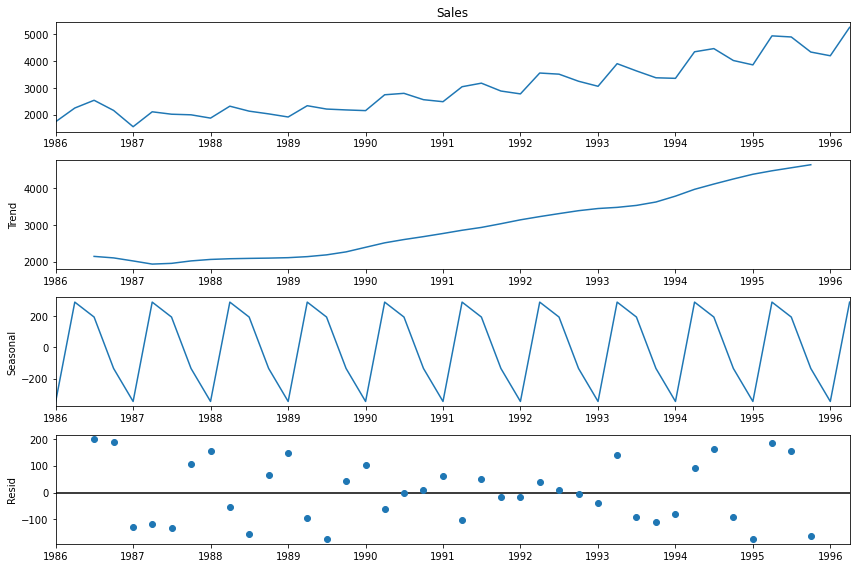

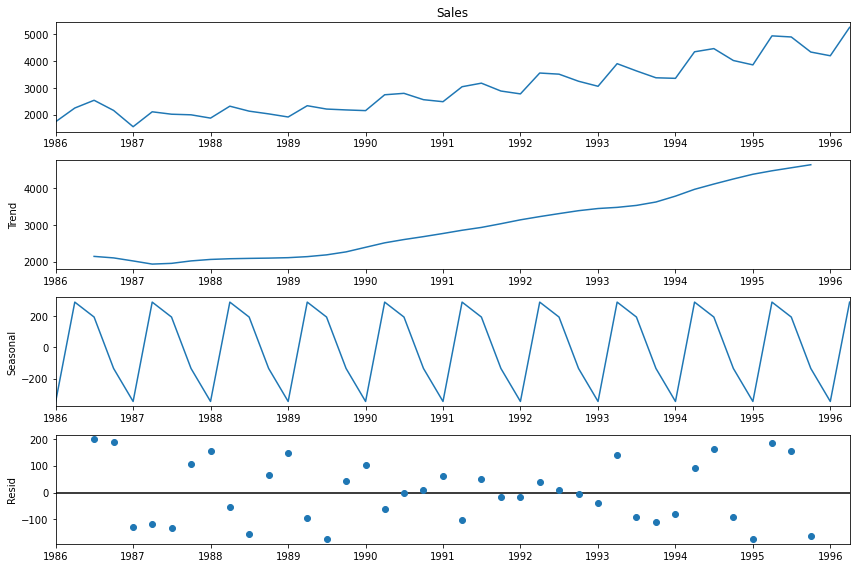

In [438]:
rcParams['figure.figsize']=[12,8]
Decomposition=sm.tsa.seasonal_decompose(df1['Sales'],model='additive')
Decomposition.plot()

# Observation:
1. data has increasing trend
2. data has seasonality


# Multiplicative time series

If the components of the time series are multiplicative together, then the time series is called the multiplicative time series. By visualization, if the time series is having exponential growth or decrement with time then the time series can be considered as the multiplicative time series. The mathematical function of the Multiplicative time series can be represented as.

y(t) = Level * Trend * seasonality * Noise

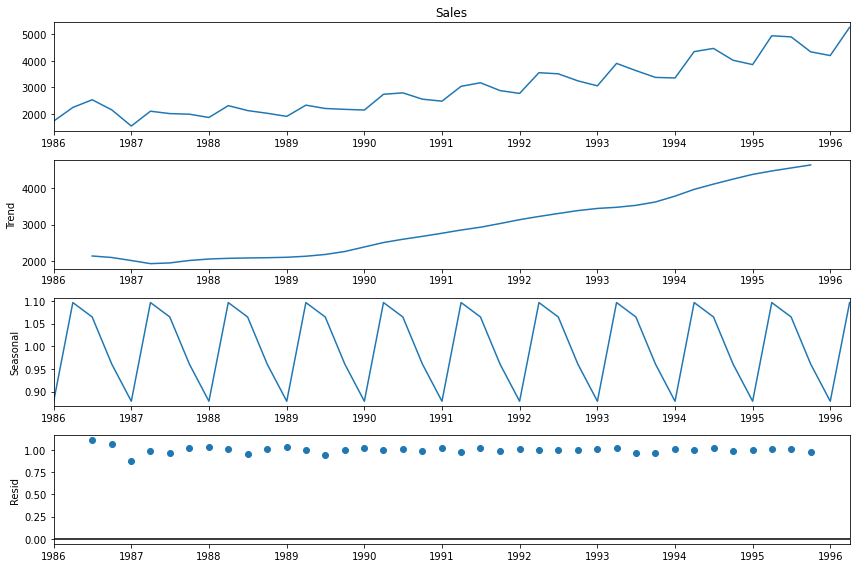

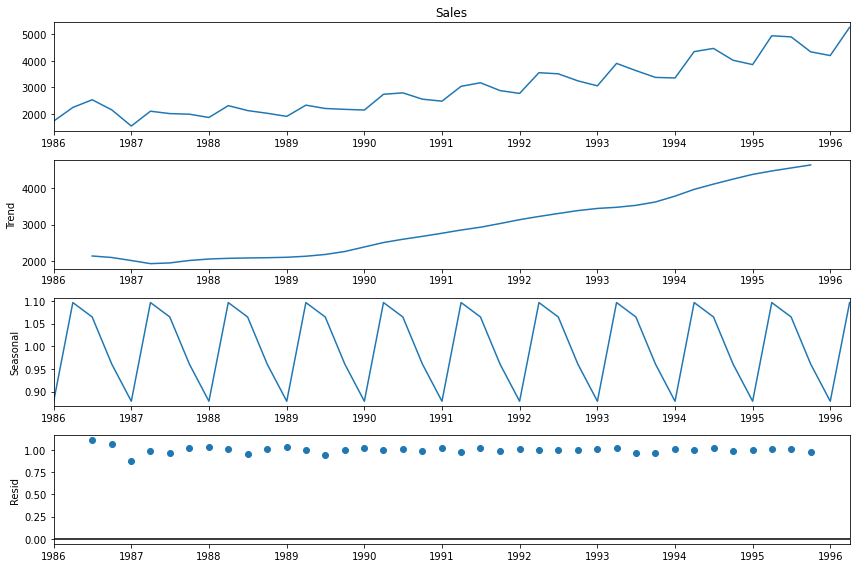

In [439]:
Decomposition_Multi=sm.tsa.seasonal_decompose(df1['Sales'],model='multiplicative')
Decomposition_Multi.plot()

# Build and Forecast time series model

## splitting the data into Train and test data

We Are going to forecast for last two year  
last 24 data are from 1995 and 1996

In [440]:
df1

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0
1987-04-01,2104.411995,Q2,0,1,0,0
1987-07-01,2014.362999,Q3,0,0,1,0
1987-10-01,1991.746998,Q4,0,0,0,1
1988-01-01,1869.049999,Q1,1,0,0,0


In [441]:
df2=pd.DataFrame(df1['Sales'])
df2.head()

,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [442]:
train_len=32
train=df2[:train_len]
test=df2[train_len:]

In [443]:
train.head()

,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [444]:
train.shape

(32, 1)

In [445]:
test.head()

,Sales
Date,
1994-01-01,3352.0
1994-04-01,4342.0
1994-07-01,4461.0
1994-10-01,4017.0
1995-01-01,3854.0


# 1. Naive Method of FOrecasting
Estimating technique in which the last period's actuals are used as this period's forecast, without adjusting them or attempting to establish causal factors. It is used only for comparison with the forecasts generated by the better (sophisticated) techniques.

In [446]:
#Forecast last two year
y_hat_naive=test.copy()
y_hat_naive

,Sales
Date,
1994-01-01,3352.0
1994-04-01,4342.0
1994-07-01,4461.0
1994-10-01,4017.0
1995-01-01,3854.0
1995-04-01,4936.0
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0


In [447]:
y_hat_naive['naive_forecast']=train['Sales'][train_len-1]

In [448]:
y_hat_naive

,Sales,naive_forecast
Date,,
1994-01-01,3352.0,3373.0
1994-04-01,4342.0,3373.0
1994-07-01,4461.0,3373.0
1994-10-01,4017.0,3373.0
1995-01-01,3854.0,3373.0
1995-04-01,4936.0,3373.0
1995-07-01,4895.0,3373.0
1995-10-01,4333.0,3373.0
1996-01-01,4194.0,3373.0


# plotting the train , Test, and forecast data

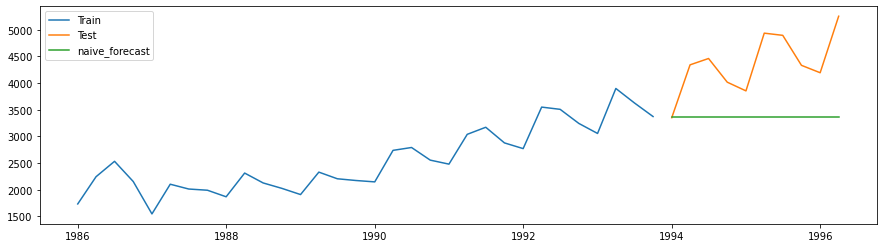

In [449]:
plt.figure(figsize=(15,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='naive_forecast')
plt.legend(loc='best')



# Observations:
1.naive methos are undervalue when they compared with test data


# 2. Simple Average Method

In [450]:
# Predicted values fore data
y_hat_SAM=test.copy()
y_hat_SAM

,Sales
Date,
1994-01-01,3352.0
1994-04-01,4342.0
1994-07-01,4461.0
1994-10-01,4017.0
1995-01-01,3854.0
1995-04-01,4936.0
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0


In [451]:
y_hat_SAM['SAM_forecasted']=train['Sales'].mean()
y_hat_SAM

,Sales,SAM_forecasted
Date,,
1994-01-01,3352.0,2566.432466
1994-04-01,4342.0,2566.432466
1994-07-01,4461.0,2566.432466
1994-10-01,4017.0,2566.432466
1995-01-01,3854.0,2566.432466
1995-04-01,4936.0,2566.432466
1995-07-01,4895.0,2566.432466
1995-10-01,4333.0,2566.432466
1996-01-01,4194.0,2566.432466


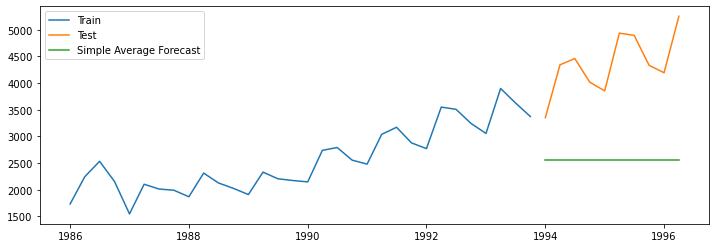

In [452]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_SAM['SAM_forecasted'],label='Simple Average Forecast')
plt.legend(loc='best')

## Observation:
Simple average method not predicting well as we have taken the average of all sales data

# Calculating the RSME And MAPE Error

### MAE 
This gives less weight to outliers, which is not sensitive to outliers.

### MAPE
refers to Mean Absolute Percentage Error, which is Similar to MAE, but normalized by true observation. Downside is when true obs is zero, this metric will be problematic.

### MSE refers to Mean Squared Error, 
MSE is like a combination measurement of bias and variance of your prediction, i.e., MSE = Bias^2 + Variance, which is also most popular one I guess.

RMSE refers to Root MSE, usually take a root of MSE would bring the unit back to actual unit, easy to interpret your model accuracy.

This is what I've come up so far, hope this would help.

In [453]:
from sklearn.metrics import mean_squared_error

# Error for Naive Method

In [454]:
# rsme=square root of mean_squared_error(mean_squared_error=mean of (actual-predicted)2)
rsme_naive=np.sqrt(mean_squared_error(test['Sales'],y_hat_naive['naive_forecast'])).round(2)
rsme_naive

1125.11

In [455]:
# mean absulute percentage error=mean of (actual-predicted)/actual*100
mape_naive=np.mean(np.abs((test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100)
mape_naive

21.61234265310269

In [456]:
# we can also define function for calculating  mape
def MAPE(actual, predicted):
    mape=np.abs((actual-predicted)/actual)*100
    return(np.mean(mape))
    

In [457]:
mape_naive=MAPE(test['Sales'],y_hat_naive['naive_forecast'])
mape_naive

21.61234265310269

In [458]:
Result=pd.DataFrame({'Method':['Naive Method'],'RSME':[rsme_naive],'MAPE':[mape_naive]})
Result

,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343


### mape is percentage erroe so naive model is 79% accurate to forecasted value

# Error for Simple average method

In [459]:
rsme_SAM=np.sqrt(mean_squared_error(test['Sales'],y_hat_SAM['SAM_forecasted'])).round(2)
rsme_SAM

1874.72

In [460]:
mape_SAM=MAPE(test['Sales'],y_hat_SAM['SAM_forecasted'])
mape_SAM

40.261429445716644

In [461]:
Result=Result.append({'Method':'Simple Average Method','RSME':rsme_SAM,'MAPE':mape_SAM},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\4091257750.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'Simple Average Method','RSME':rsme_SAM,'MAPE':mape_SAM},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429


### Error for Simple average method is more than Naive method

# Simple Moving Average Method
In simple moving average Method we consider only latest Observatio to take average instead of fist since latest values has more impst than older, here we define window size to take average of 

In [462]:
y_hat_MA=df2.copy()
y_hat_MA.shape

(42, 1)

In [463]:
ma_window=12

In [464]:
# calculating the moving average over train data set
y_hat_MA['MA_forecasted']=df2['Sales'].rolling(ma_window).mean()
y_hat_MA

,Sales,MA_forecasted
Date,,
1986-01-01,1734.827000,NaN
1986-04-01,2244.960999,NaN
1986-07-01,2533.804993,NaN
1986-10-01,2154.962997,NaN
1987-01-01,1547.818996,NaN
1987-04-01,2104.411995,NaN
1987-07-01,2014.362999,NaN
1987-10-01,1991.746998,NaN
1988-01-01,1869.049999,NaN


In [465]:
y_hat_MA['MA_forecasted'][train_len:]:y_hat_MA['MA_forecasted'][:train_len]

In [466]:
y_hat_MA

,Sales,MA_forecasted
Date,,
1986-01-01,1734.827000,NaN
1986-04-01,2244.960999,NaN
1986-07-01,2533.804993,NaN
1986-10-01,2154.962997,NaN
1987-01-01,1547.818996,NaN
1987-04-01,2104.411995,NaN
1987-07-01,2014.362999,NaN
1987-10-01,1991.746998,NaN
1988-01-01,1869.049999,NaN


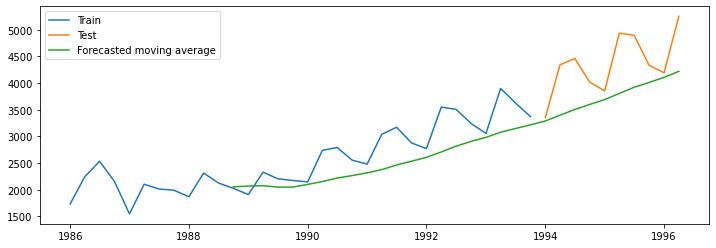

In [467]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_MA['MA_forecasted'],label='Forecasted moving average')
plt.legend(loc='best')

Observation:
1. graph lloks good as compared to Simple moving average and Naive method
2. Seasonality not captured well but the trend is observed in forecasted values

In [468]:
# calculated the rsme for test data only
rsme_MA=np.sqrt(mean_squared_error(test['Sales'],y_hat_MA['MA_forecasted'][train_len:])).round(2)
rsme_MA

735.61

In [469]:
mape_MA=MAPE(test['Sales'],y_hat_MA['MA_forecasted'][train_len:])
mape_MA

13.157210117317197

In [470]:
y_hat_MA['MA_forecasted'][32:].shape

(10,)

In [471]:
Result=Result.append({'Method':'Moving Average Method','RSME':rsme_MA,'MAPE':mape_MA},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\1883544411.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'Moving Average Method','RSME':rsme_MA,'MAPE':mape_MA},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210


# EXponential SMoothing Family:
1.Simple Exponential Smoothing( Capture only Level)  
2.Holt's Exponential Smoothing(level+trend)  
3.Holt's Winter Exponential Smoothing Method(level+ trend+seasonality)

# 1. Simple Exponential Smoothing Method

In [472]:
#Load the module for Simple Exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [473]:
#instatiate the model
model=SimpleExpSmoothing(train['Sales'])
model_fit=model.fit(smoothing_level=0.2,optimized=False)
# Optimized= false we have to definr the smoothing level
# optimizze= True it will take default values for smoothing level
model_fit.params

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1734.8269996643066,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [474]:
y_hat_SES=test.copy()


In [475]:
# forecating for two year
y_hat_SES['SES Forecast']=model_fit.forecast(24)
y_hat_SES

,Sales,SES Forecast
Date,,
1994-01-01,3352.0,3319.588314
1994-04-01,4342.0,3319.588314
1994-07-01,4461.0,3319.588314
1994-10-01,4017.0,3319.588314
1995-01-01,3854.0,3319.588314
1995-04-01,4936.0,3319.588314
1995-07-01,4895.0,3319.588314
1995-10-01,4333.0,3319.588314
1996-01-01,4194.0,3319.588314


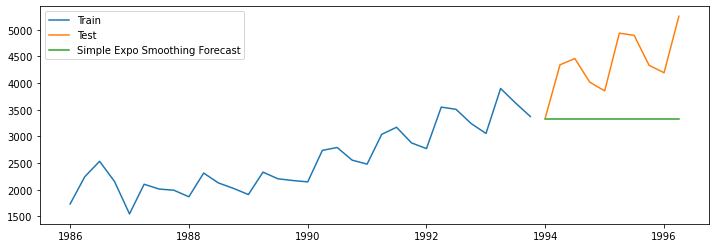

In [476]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_SES['SES Forecast'],label='Simple Expo Smoothing Forecast')
plt.legend(loc='best')

# Observation:
1. No seasonality obs
2. No trend Obs


In [477]:
rsme_SES=np.sqrt(mean_squared_error(test['Sales'],y_hat_SES['SES Forecast'])).round(2)
rsme_SES

1172.41

In [478]:
mape_SES=MAPE(test['Sales'],y_hat_SES['SES Forecast'])
mape_SES

22.730302345532625

In [479]:
Result=Result.append({'Method':'Simple Expo Smoothing Method','RSME':rsme_SES,'MAPE':mape_SES},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\1293115673.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'Simple Expo Smoothing Method','RSME':rsme_SES,'MAPE':mape_SES},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302


# Holt method( double exponential)
Capture both Level amd trend

In [480]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [481]:
# we have to pass the array of the data frame into Exponential smootthing instant
# since the data is linear we are using additive method instead of multiplicative model
# Incase of Geometric trend we can go for multiplicative model
# SeaSonal= none since we are not capturing any seasonality
model=ExponentialSmoothing(np.asarray(train['Sales']),seasonal_periods=12,trend='additive',seasonal=None)

In [482]:
# Smoothing level= it is level parameter(alpha)
# Smoothing slope=it is trend parameter (beta)
#Optimized must be FAlse when we define the smoothing parameter if true then it will take defalt values
model_fit=model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)
model.params

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\3243892794.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit=model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)


{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 2050.8788637797024,
 'initial_trend': 0.014369710286597837,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [483]:
# We are forecasting for next 2 year i.e 24 month
y_hat_holt=test.copy()
y_hat_holt['holt_Forecast']=model_fit.forecast(10)

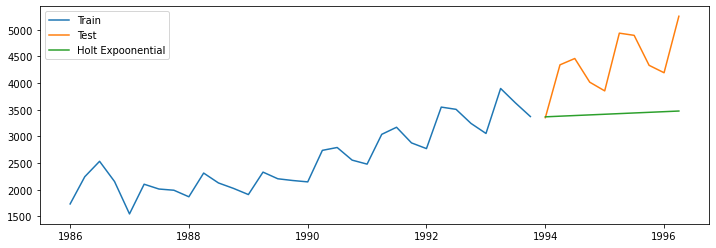

In [484]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_holt['holt_Forecast'],label='Holt Expoonential')
plt.legend(loc='best')

In [485]:
rsme_Holt=np.sqrt(mean_squared_error(test['Sales'],y_hat_holt['holt_Forecast'])).round(2)
rsme_Holt

1072.11

In [486]:
mape_Holt=MAPE(test['Sales'],y_hat_holt['holt_Forecast'])
mape_Holt

20.506213723724933

In [487]:
Result=Result.append({'Method':'Holt Expo Smoothing Method','RSME':rsme_Holt,'MAPE':mape_Holt},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\3789993076.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'Holt Expo Smoothing Method','RSME':rsme_Holt,'MAPE':mape_Holt},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214


# 3. Holt's Winter Expo Smoothing method
Capture Level, trend and Seasonality
## A.Additive Method

In [488]:
y_hat_hwa=test.copy()


In [489]:
# we have to pass the Array data for Exponential Smoothing
# seasonal periods=12 as we are calculating for month  if we took by quarter then we can give 4
# seasonal=additive 
model=ExponentialSmoothing(train['Sales'],seasonal_periods=12,trend='additive',seasonal='additive')

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [490]:
# here let the model decide optimized values
model_fit=model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.8073439573518066,
 'smoothing_trend': 0.014020190126305735,
 'smoothing_seasonal': 0.1515308614667979,
 'damping_trend': nan,
 'initial_level': 1974.1777771703755,
 'initial_trend': 39.51834645442324,
 'initial_seasons': array([-286.33670924,  182.6301423 ,  170.78364316,  -44.07892042,
        -337.22633396,  247.81655024,   78.38515219,  -94.65248377,
        -201.51090148,  262.43779598,  146.33526795, -121.23674583]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [491]:
y_hat_hwa['hwa_Forecast']=model_fit.forecast(24)

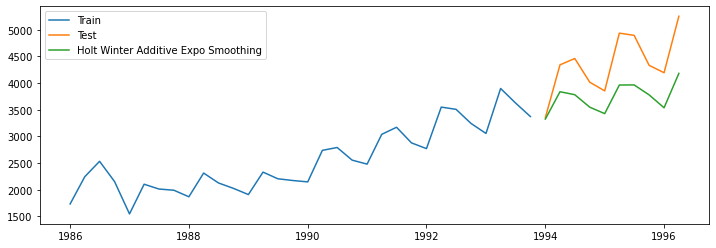

In [492]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_hwa['hwa_Forecast'],label='Holt Winter Additive Expo Smoothing')
plt.legend(loc='best')

### Obserpavation:
1. Level trend and seasonality captured here.

In [493]:
rsme_hwa=np.sqrt(mean_squared_error(test['Sales'],y_hat_hwa['hwa_Forecast'])).round(2)
rsme_hwa

693.52

In [494]:
mape_hwa=MAPE(test['Sales'],y_hat_hwa['hwa_Forecast'])
mape_hwa

13.78217390592186

In [495]:
Result=Result.append({'Method':'Holt winter additive Expo Smoothing Method','RSME':rsme_hwa,'MAPE':mape_hwa},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\3534270072.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'Holt winter additive Expo Smoothing Method','RSME':rsme_hwa,'MAPE':mape_hwa},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214
5,Holt winter additive Expo Smoothing Method,693.52,13.782174


## B. Multiplicative Model

In [496]:
model=ExponentialSmoothing(train['Sales'],seasonal_periods=12,trend='additive',seasonal='multiplicative')

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [497]:
model_fit=model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.7602539785062415,
 'smoothing_trend': 0.00010249569458379455,
 'smoothing_seasonal': 0.17885305309471003,
 'damping_trend': nan,
 'initial_level': 1906.309487329039,
 'initial_trend': 42.768569792591386,
 'initial_seasons': array([0.90312077, 1.11257638, 1.11118755, 1.01445784, 0.89028597,
        1.11380653, 1.0460674 , 0.96364503, 0.90859422, 1.09943953,
        1.07497133, 0.96404037]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [498]:
y_hat_hwm=test.copy()

In [499]:
y_hat_hwm['hwm_Forecast']=model_fit.forecast(24)

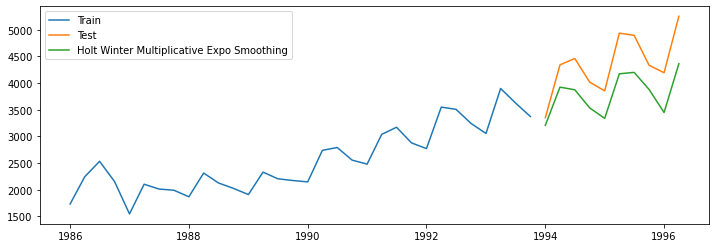

In [500]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_hwm['hwm_Forecast'],label='Holt Winter Multiplicative Expo Smoothing')
plt.legend(loc='best')

In [501]:
rsme_hwm=np.sqrt(mean_squared_error(test['Sales'],y_hat_hwm['hwm_Forecast'])).round(2)
rsme_hwm

604.48

In [502]:
mape_hwm=MAPE(test['Sales'],y_hat_hwm['hwm_Forecast'])
mape_hwm

12.723894662656088

In [503]:
Result=Result.append({'Method':'Holt winter Multiplicative Expo Smoothing Method','RSME':rsme_hwm,'MAPE':mape_hwm},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\3521422796.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'Holt winter Multiplicative Expo Smoothing Method','RSME':rsme_hwm,'MAPE':mape_hwm},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895


# Time Series Forecasting=II

## Auto Regressive Model (AR)
## Stationarity Vs Non-Stationarity Time Series

### 1. Visually Checking for Stationarity

<AxesSubplot:xlabel='Date'>

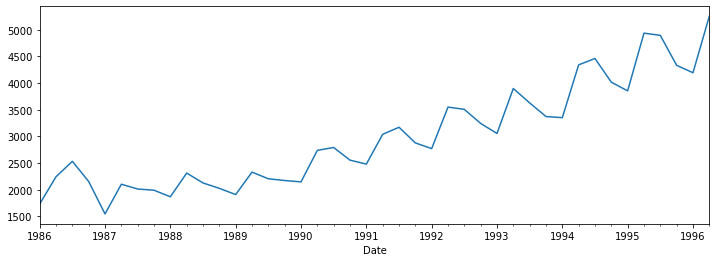

In [504]:
df2['Sales'].plot(figsize=(12,4))

# Observations:
1. There is increasing trend But the trend is not constant.
2. VArience is also not constat  
hence series is not stationary

### 2. Augmented dickey Fuller (ADF) Test

Ho : series is not Stationary(p > 0.05)  
Ha : Series is Stationary (p< 0.05)

In [505]:
from statsmodels.tsa.stattools import adfuller

In [506]:
adf_test=adfuller(df2['Sales'])
adf_test

(1.3094210153268104,
 0.9966611673930905,
 7,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 395.6639212829265)

Since P(0.99)> 0.05  hence
Series is non statinary

### 3. kwiatkowski phillips schmidt shin test

Ho : series is  Stationary(p > 0.05)  
Ha : Series is not Stationary (p< 0.05)

In [507]:
from statsmodels.tsa.stattools import kpss

In [508]:
kpss_test=kpss(df2['Sales'])
kpss_test

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(0.8990553614014225,
 0.01,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Since p(0.01)< 0.05 hence the series is not stationary

# Converting Non Stationary To Stationary Time Series

### Box Cox transformation
Box Cox Transformation make varience constant in time Series

In [509]:
from scipy.stats import boxcox

In [510]:
# Creating the new data set with boxcox transformation
df_boxcox=pd.Series(boxcox(df2['Sales'],lmbda=0),df2.index)
df_boxcox.head()

Date
1986-01-01    7.458663
1986-04-01    7.716443
1986-07-01    7.837477
1986-10-01    7.675529
1987-01-01    7.344602
dtype: float64

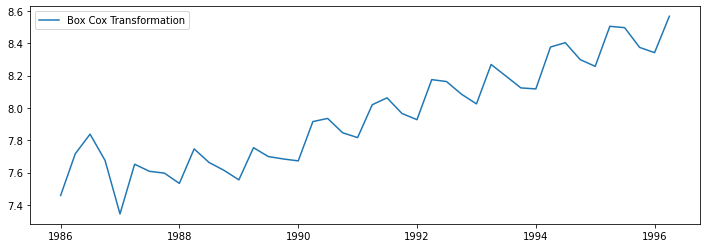

In [511]:
plt.figure(figsize=(12,4))
plt.plot(df_boxcox,label='Box Cox Transformation')
plt.legend(loc='best')

here we can see that now varience of data is constant, but the series has upward trend and hence mean of series is not constant, to make it constant we can use differencing techmique

# Differencing
1. Differencing is performed by differencing previous obs from current Obs
2. differencing remove the trend and seasonality from series

In [512]:
# df_boxcox-df_boxcox.shift():- perform the diff between the previous and current obs
df_boxcox_diff=pd.Series(df_boxcox - df_boxcox.shift())
df_boxcox_diff.head()

Date
1986-01-01         NaN
1986-04-01    0.257780
1986-07-01    0.121034
1986-10-01   -0.161949
1987-01-01   -0.330927
dtype: float64

In [513]:
# since first obd id null we can drop it
df_boxcox_diff.dropna(inplace=True)
df_boxcox_diff

Date
1986-04-01    0.257780
1986-07-01    0.121034
1986-10-01   -0.161949
1987-01-01   -0.330927
1987-04-01    0.307189
1987-07-01   -0.043733
1987-10-01   -0.011291
1988-01-01   -0.063582
1988-04-01    0.213388
1988-07-01   -0.083486
1988-10-01   -0.048860
1989-01-01   -0.059053
1989-04-01    0.198949
1989-07-01   -0.054938
1989-10-01   -0.014876
1990-01-01   -0.011887
1990-04-01    0.243039
1990-07-01    0.019323
1990-10-01   -0.088581
1991-01-01   -0.029796
1991-04-01    0.203049
1991-07-01    0.042698
1991-10-01   -0.096956
1992-01-01   -0.037874
1992-04-01    0.247379
1992-07-01   -0.011902
1992-10-01   -0.078282
1993-01-01   -0.059657
1993-04-01    0.243613
1993-07-01   -0.071763
1993-10-01   -0.073155
1994-01-01   -0.006245
1994-04-01    0.258778
1994-07-01    0.027038
1994-10-01   -0.104838
1995-01-01   -0.041424
1995-04-01    0.247444
1995-07-01   -0.008341
1995-10-01   -0.121954
1996-01-01   -0.032605
1996-04-01    0.225144
dtype: float64

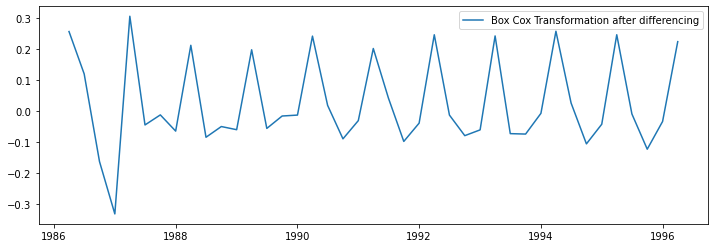

In [514]:
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff,label='Box Cox Transformation after differencing')
plt.legend(loc='best')

# OBSERVATION:-
1. No upward or dounward trend observed after differencing on boxcox transformation.
2. mean is constant and seem almost zero
2. Varience Also look constant 

let's Test stationarity again

## ADF test

In [515]:
adf_test=adfuller(df_boxcox_diff)
adf_test

(-3.1903923155048397,
 0.02054758887892842,
 6,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 -109.81779683814219)

We can see the p value is < 0.05 hence we accept the alternate hypothesis  
Series is Statinary

# Autocorrelation

## Autocorrelation Function(ACF)

Autocorrelation function capture both direct and indirect relationship with its lagged values

In [516]:
from statsmodels.graphics.tsaplots import plot_acf

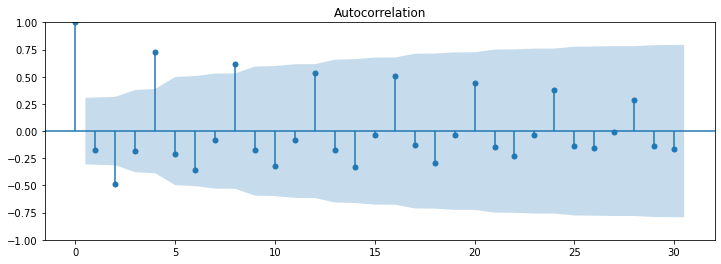

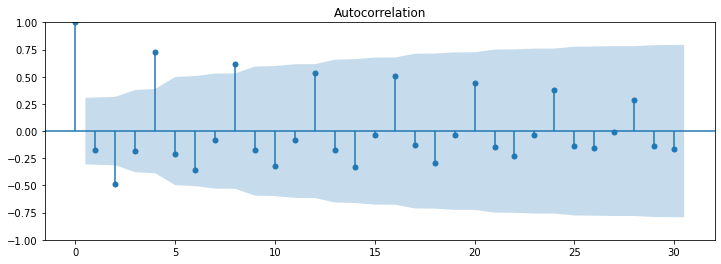

In [517]:
plt.figure(figsize=(12,4))
plot_acf(df_boxcox_diff,ax=plt.gca(),lags=30)

## Observations:
1. the Shaded portion is less significant
2. at lag=0 coralation=1 as data is correlated with itself


# Partial Autocorrelation Function(PACF)
capture only direct corelation

In [518]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


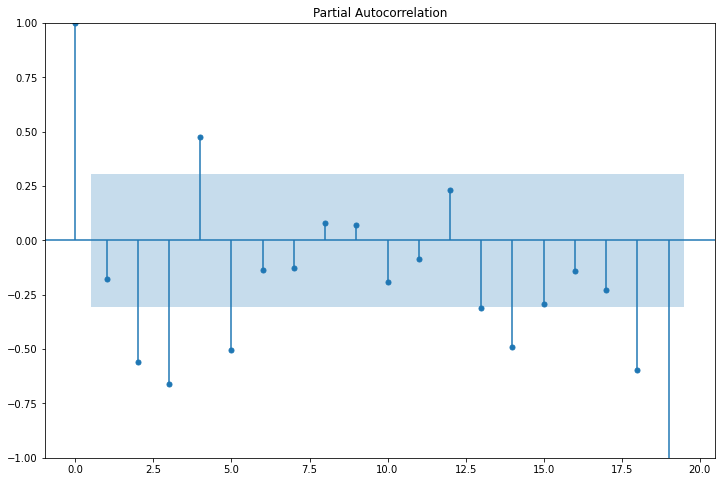

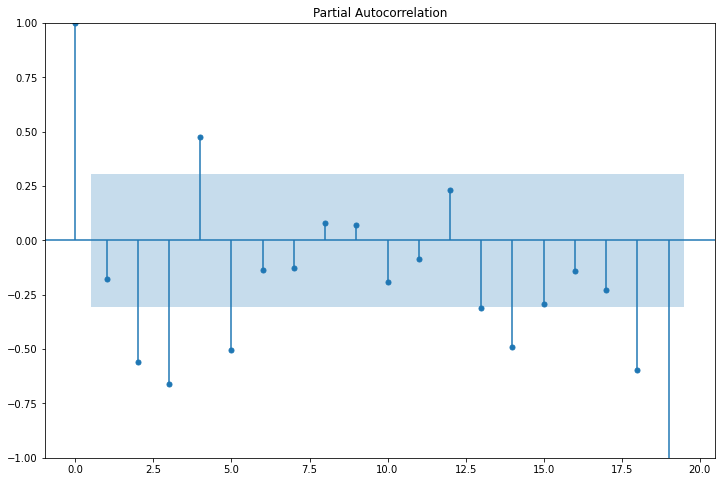

In [519]:
plot_pacf(df_boxcox_diff,ax=plt.gca(),lags=19)

# Building the regression model

# Splitting the stationary data set into train and test data

In [520]:
# Splitting the data boxcox
train_data_boxcox=df_boxcox[:train_len]
test_data_boxcox=df_boxcox[train_len:]

In [521]:
# Solitting the data boxcox_diff
train_data_boxcox_diff=df_boxcox_diff[:train_len-1]
test_data_boxcox_diff=df_boxcox_diff[train_len-1:]

# Simple Auto Regresisive Model (AR)

In [522]:
from statsmodels.tsa.arima.model import ARIMA

### Order (p,q,d)
p=Period of lag: p help to adjust the line that being fitted to forecast the series  
d= in ARIMA model we transform the series into stationary one( series without trend and seasonality) using differencing, d is number of differencing transformation required by time series to get stationary  
q= lag of the error component  , where error component is part of time series not  explained by trend or seasonality

In [523]:
# p=1  : as we are calculating for one lag time rperiod only
# q=0  :as we have already converted time series into stationary series
model=ARIMA(train_data_boxcox_diff,order=(1,0,0))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [524]:
model_fit=model.fit()
model_fit.params

const     0.020624
ar.L1    -0.215173
sigma2    0.020561
dtype: float64

constant is close to zero since in stationary time series mean is cloze to zero  
coefficient=-0.215


# Forecast

In [525]:
y_hat_ar=df_boxcox_diff.copy()

In [526]:
y_hat_ar['AR_forecast_boxcox_diff']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_ar['AR_forecast_boxcox_diff']

1986-04-01    0.020624
1986-07-01   -0.030405
1986-10-01   -0.000981
1987-01-01    0.059909
1987-04-01    0.096269
1987-07-01   -0.041037
1987-10-01    0.034472
1988-01-01    0.027492
1988-04-01    0.038743
1988-07-01   -0.020853
1988-10-01    0.043026
1989-01-01    0.035576
1989-04-01    0.037769
1989-07-01   -0.017746
1989-10-01    0.036883
1990-01-01    0.028263
1990-04-01    0.027620
1990-07-01   -0.027233
1990-10-01    0.020904
1991-01-01    0.044122
1991-04-01    0.031473
1991-07-01   -0.018629
1991-10-01    0.015875
1992-01-01    0.045924
1992-04-01    0.033212
1992-07-01   -0.028167
1992-10-01    0.027623
1993-01-01    0.041906
1993-04-01    0.037899
1993-07-01   -0.027357
1993-10-01    0.040504
1994-01-01    0.040803
1994-04-01    0.016282
1994-07-01    0.021559
1994-10-01    0.020423
1995-01-01    0.020668
1995-04-01    0.020615
1995-07-01    0.020626
1995-10-01    0.020624
1996-01-01    0.020624
1996-04-01    0.020624
Freq: QS-OCT, Name: predicted_mean, dtype: float64

# Recover the original time series forecast

as we have converted origoinal series into stationary by boxcox and differencing transformation. We have transform the series back to original one( Step by Step)

In [527]:
# We did differencing. so we need to revert it by adding the consecutive observation
# so we are using cumsum method
y_hat_ar['AR_forecast_boxcox']=y_hat_ar['AR_forecast_boxcox_diff'].cumsum()
y_hat_ar['AR_forecast_boxcox']

1986-04-01    0.020624
1986-07-01   -0.009781
1986-10-01   -0.010762
1987-01-01    0.049147
1987-04-01    0.145416
1987-07-01    0.104379
1987-10-01    0.138851
1988-01-01    0.166343
1988-04-01    0.205086
1988-07-01    0.184233
1988-10-01    0.227259
1989-01-01    0.262834
1989-04-01    0.300603
1989-07-01    0.282857
1989-10-01    0.319740
1990-01-01    0.348003
1990-04-01    0.375623
1990-07-01    0.348390
1990-10-01    0.369294
1991-01-01    0.413417
1991-04-01    0.444890
1991-07-01    0.426261
1991-10-01    0.442136
1992-01-01    0.488060
1992-04-01    0.521272
1992-07-01    0.493105
1992-10-01    0.520728
1993-01-01    0.562634
1993-04-01    0.600533
1993-07-01    0.573176
1993-10-01    0.613680
1994-01-01    0.654483
1994-04-01    0.670765
1994-07-01    0.692324
1994-10-01    0.712747
1995-01-01    0.733415
1995-04-01    0.754030
1995-07-01    0.774656
1995-10-01    0.795280
1996-01-01    0.815904
1996-04-01    0.836528
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [528]:
#  We removed first observation after differencing as it was null, hence we are adding back
y_hat_ar['AR_forecast_boxcox']=y_hat_ar['AR_forecast_boxcox'].add(df_boxcox[0])
y_hat_ar['AR_forecast_boxcox']

1986-04-01    7.479287
1986-07-01    7.448882
1986-10-01    7.447901
1987-01-01    7.507810
1987-04-01    7.604079
1987-07-01    7.563042
1987-10-01    7.597514
1988-01-01    7.625006
1988-04-01    7.663749
1988-07-01    7.642896
1988-10-01    7.685922
1989-01-01    7.721497
1989-04-01    7.759266
1989-07-01    7.741520
1989-10-01    7.778403
1990-01-01    7.806666
1990-04-01    7.834286
1990-07-01    7.807053
1990-10-01    7.827957
1991-01-01    7.872080
1991-04-01    7.903553
1991-07-01    7.884924
1991-10-01    7.900799
1992-01-01    7.946723
1992-04-01    7.979935
1992-07-01    7.951768
1992-10-01    7.979391
1993-01-01    8.021297
1993-04-01    8.059196
1993-07-01    8.031839
1993-10-01    8.072343
1994-01-01    8.113146
1994-04-01    8.129428
1994-07-01    8.150987
1994-10-01    8.171410
1995-01-01    8.192078
1995-04-01    8.212693
1995-07-01    8.233319
1995-10-01    8.253943
1996-01-01    8.274567
1996-04-01    8.295191
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [529]:
# now doing the reverse transformation. 
# we have done box cox log log transformation with lambda=0
# we have to do exponential tranformation
y_hat_ar['AR_forecast']=np.exp(y_hat_ar['AR_forecast_boxcox'])
y_hat_ar['AR_forecast']

1986-04-01    1770.978149
1986-07-01    1717.941329
1986-10-01    1716.256591
1987-01-01    1822.218397
1987-04-01    2006.362511
1987-07-01    1925.694311
1987-10-01    1993.234912
1988-01-01    2048.792358
1988-04-01    2129.726941
1988-07-01    2085.774884
1988-10-01    2177.476081
1989-01-01    2256.335496
1989-04-01    2343.184289
1989-07-01    2301.968169
1989-10-01    2388.457568
1990-01-01    2456.925731
1990-04-01    2525.731848
1990-07-01    2457.875935
1990-10-01    2509.797061
1991-01-01    2623.014535
1991-04-01    2706.882822
1991-07-01    2656.923949
1991-10-01    2699.438103
1992-01-01    2826.298795
1992-04-01    2921.741001
1992-07-01    2840.592172
1992-10-01    2920.151684
1993-01-01    3045.124871
1993-04-01    3162.746054
1993-07-01    3077.395779
1993-10-01    3204.600138
1994-01-01    3338.061874
1994-04-01    3392.858440
1994-07-01    3466.797833
1994-10-01    3538.329235
1995-01-01    3612.218868
1995-04-01    3687.457679
1995-07-01    3764.306213
1995-10-01  

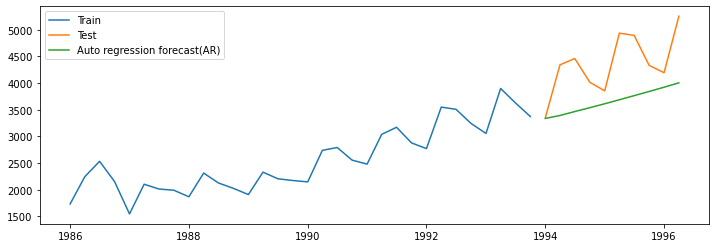

In [530]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_ar['AR_forecast'][test.index.min():],label="Auto regression forecast(AR)")
plt.legend(loc='best')

In [531]:
rsme_AR=np.sqrt(mean_squared_error(test['Sales'],y_hat_ar['AR_forecast'][test.index.min():])).round(2)
rsme_AR

829.87

In [532]:
mape_AR=MAPE(test['Sales'],y_hat_ar['AR_forecast'][test.index.min():])
mape_AR

15.269134597465499

In [533]:
Result=Result.append({'Method':'AR Method','RSME':rsme_AR,'MAPE':mape_AR},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\2533343007.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'AR Method','RSME':rsme_AR,'MAPE':mape_AR},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895
7,AR Method,829.87,15.269135


# Moving Average Method(MA)

In [534]:
# as in moving average method we forecast from past data we have to select the window size i.e q
# if q=1 then MA(1)
# if q=3 then MA(3)
# p=0, d=0  as we not considering these parameter in this model
model=ARIMA(train_data_boxcox_diff,order=(0,0,1))


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [535]:
model_fit=model.fit()
model_fit.params

const     0.020373
ma.L1    -0.775110
sigma2    0.014949
dtype: float64

In [536]:
y_hat_MA=df_boxcox_diff.copy()

In [537]:
y_hat_MA['MA_forecast_boxcox_diff']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox.index.max())
y_hat_MA['MA_forecast_boxcox_diff'].head()

1986-04-01    0.020373
1986-07-01   -0.094580
1986-10-01   -0.116001
1987-01-01    0.052442
1987-04-01    0.300758
Freq: QS-OCT, Name: predicted_mean, dtype: float64

# Recocover the original series


In [538]:
# recover Differencing
y_hat_MA['MA_forecast_boxcox']=y_hat_MA['MA_forecast_boxcox_diff'].cumsum()
y_hat_MA['MA_forecast_boxcox'].head()

1986-04-01    0.020373
1986-07-01   -0.074207
1986-10-01   -0.190209
1987-01-01   -0.137766
1987-04-01    0.162992
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [539]:
# adding first obs
y_hat_MA['MA_forecast_boxcox']=y_hat_MA['MA_forecast_boxcox'].add(df_boxcox[0])
y_hat_MA['MA_forecast_boxcox'].head()

1986-04-01    7.479036
1986-07-01    7.384456
1986-10-01    7.268454
1987-01-01    7.320897
1987-04-01    7.621655
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [540]:
# remove the boxcox transformation
y_hat_MA['MA_forecast']=np.exp(y_hat_MA['MA_forecast_boxcox'])
y_hat_MA['MA_forecast']

1986-04-01    1770.533260
1986-07-01    1610.750923
1986-10-01    1434.331848
1987-01-01    1511.558615
1987-04-01    2041.938358
1987-07-01    2073.942340
1987-10-01    2214.194986
1988-01-01    2396.603703
1988-04-01    2730.027709
1988-07-01    2613.040589
1988-10-01    2749.928670
1989-01-01    3032.185671
1989-04-01    3494.034449
1989-07-01    3411.446757
1989-10-01    3566.353846
1990-01-01    3810.876491
1990-04-01    4132.329278
1990-07-01    3719.581470
1990-10-01    3446.798926
1991-01-01    3551.756329
1991-04-01    3796.806772
1991-07-01    3486.375619
1991-10-01    3222.074146
1992-01-01    3334.897268
1992-04-01    3599.691836
1992-07-01    3217.804134
1992-10-01    3038.516532
1993-01-01    3151.828804
1993-04-01    3465.913463
1993-07-01    3152.363579
1993-10-01    3160.249521
1994-01-01    3420.078580
1994-04-01    3490.470738
1994-07-01    3562.311709
1994-10-01    3635.631313
1995-01-01    3710.459983
1995-04-01    3786.828779
1995-07-01    3864.769400
1995-10-01  

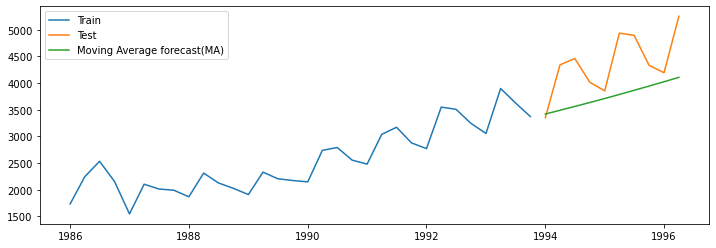

In [541]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_MA['MA_forecast'][test.index.min():],label="Moving Average forecast(MA)")
plt.legend(loc='best')

In [542]:
rsme_MA=np.sqrt(mean_squared_error(test['Sales'],y_hat_MA['MA_forecast'][test.index.min():])).round(2)
rsme_MA

746.67

In [543]:
mape_MA=MAPE(test['Sales'],y_hat_MA['MA_forecast'][test.index.min():])
mape_MA

13.411272971134082

In [544]:
Result=Result.append({'Method':'MA Method','RSME':rsme_MA,'MAPE':mape_MA},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\3862614764.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'MA Method','RSME':rsme_MA,'MAPE':mape_MA},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895
7,AR Method,829.87,15.269135
8,MA Method,746.67,13.411273


# Auto Regressive moving Average(ARMA)

Combonation of AR and MA

In [545]:
# p=1, d=0  q=1 
model=ARIMA(train_data_boxcox_diff,order=(1,0,1))


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [546]:
model_fit=model.fit()
model_fit.params

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


const     0.021773
ar.L1     0.277080
ma.L1    -0.999302
sigma2    0.013456
dtype: float64

In [547]:
y_hat_ARMA=df_boxcox_diff.copy()

In [548]:
y_hat_ARMA['ARMA_forecast_boxcox_diff']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox.index.max())
y_hat_ARMA['ARMA_forecast_boxcox_diff'].head()

1986-04-01    0.021773
1986-07-01   -0.063534
1986-10-01   -0.086290
1987-01-01    0.030653
1987-04-01    0.222923
Freq: QS-OCT, Name: predicted_mean, dtype: float64

# Recocover the original series

In [549]:
# recover Differencing
y_hat_ARMA['ARMA_forecast_boxcox']=y_hat_ARMA['ARMA_forecast_boxcox_diff'].cumsum()
y_hat_ARMA['ARMA_forecast_boxcox'].head()

1986-04-01    0.021773
1986-07-01   -0.041761
1986-10-01   -0.128052
1987-01-01   -0.097399
1987-04-01    0.125524
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [550]:
# adding first obs
y_hat_ARMA['ARMA_forecast_boxcox']=y_hat_ARMA['ARMA_forecast_boxcox'].add(df_boxcox[0])
y_hat_ARMA['ARMA_forecast_boxcox'].head()

1986-04-01    7.480436
1986-07-01    7.416902
1986-10-01    7.330611
1987-01-01    7.361264
1987-04-01    7.584187
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [551]:
# remove the boxcox transformation
y_hat_ARMA['ARMA_forecast']=np.exp(y_hat_ARMA['ARMA_forecast_boxcox'])
y_hat_ARMA['ARMA_forecast']

1986-04-01    1773.013388
1986-07-01    1663.870025
1986-10-01    1526.314465
1987-01-01    1573.824822
1987-04-01    1966.847816
1987-07-01    2024.809632
1987-10-01    2165.181480
1988-01-01    2350.201695
1988-04-01    2673.254700
1988-07-01    2668.260619
1988-10-01    2853.978525
1989-01-01    3183.449621
1989-04-01    3718.876298
1989-07-01    3833.350444
1989-10-01    4154.138533
1990-01-01    4596.451232
1990-04-01    5178.075206
1990-07-01    5003.945824
1990-10-01    4857.381619
1991-01-01    5092.225164
1991-04-01    5521.625403
1991-07-01    5280.097025
1991-10-01    4991.658093
1992-01-01    5133.441144
1992-04-01    5497.795922
1992-07-01    5035.458113
1992-10-01    4738.596331
1993-01-01    4790.812764
1993-04-01    5125.119754
1993-07-01    4697.175729
1993-10-01    4608.367502
1994-01-01    4834.416962
1994-04-01    4976.710254
1994-07-01    5096.463266
1994-10-01    5211.539025
1995-01-01    5327.073429
1995-04-01    5444.563251
1995-07-01    5564.472777
1995-10-01  

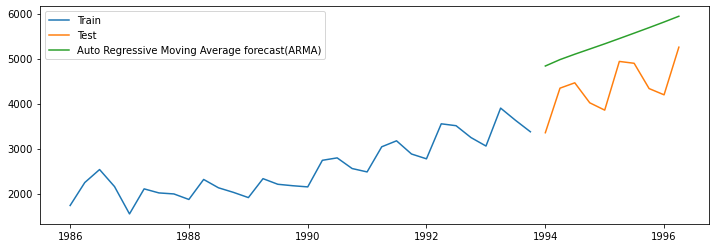

In [552]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_ARMA['ARMA_forecast'][test.index.min():],label="Auto Regressive Moving Average forecast(ARMA)")
plt.legend(loc='best')

In [553]:
rsme_ARMA=np.sqrt(mean_squared_error(test['Sales'],y_hat_ARMA['ARMA_forecast'][test.index.min():])).round(2)
rsme_ARMA

1105.97

In [554]:
mape_ARMA=MAPE(test['Sales'],y_hat_ARMA['ARMA_forecast'][test.index.min():])
mape_ARMA

24.79372422167131

In [555]:
Result=Result.append({'Method':'ARMA Method','RSME':rsme_ARMA,'MAPE':mape_ARMA},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\935589548.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'ARMA Method','RSME':rsme_ARMA,'MAPE':mape_ARMA},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895
7,AR Method,829.87,15.269135
8,MA Method,746.67,13.411273
9,ARMA Method,1105.97,24.793724


# Auto Regressive Integrated Moving Average (ARIMA)
Automatically perform the differencing if series has trend

In [556]:
# passing only transformed boxcox data without diff as model automatically diff the series
# p=1, d=1 q=1  
model=ARIMA(train_data_boxcox,order=(1,1,1))


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [557]:
model_fit=model.fit()
model_fit.params

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar.L1     0.132304
ma.L1    -0.615591
sigma2    0.017887
dtype: float64

In [558]:
y_hat_ARIMA=df_boxcox_diff.copy()

In [559]:
y_hat_ARIMA['ARIMA_forecast_boxcox']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_ARIMA['ARIMA_forecast_boxcox'].head()

1986-04-01    7.458663
1986-07-01    7.622340
1986-10-01    7.730040
1987-01-01    7.686818
1987-04-01    7.509502
Freq: QS-OCT, Name: predicted_mean, dtype: float64

# Recocover the original series
arima automatically take care of reverse differencing so need not to take reverse differencing

In [560]:
# remove the boxcox transformation
y_hat_ARIMA['ARIMA_forecast']=np.exp(y_hat_ARIMA['ARIMA_forecast_boxcox'])
y_hat_ARIMA['ARIMA_forecast']

1986-04-01    1734.826895
1986-07-01    2043.338395
1986-10-01    2275.692137
1987-01-01    2179.427514
1987-04-01    1825.303570
1987-07-01    2008.518625
1987-10-01    1999.167226
1988-01-01    1993.329310
1988-04-01    1928.301876
1988-07-01    2127.422841
1988-10-01    2104.394735
1989-01-01    2060.866603
1989-04-01    1986.175453
1989-07-01    2168.636643
1989-10-01    2167.322571
1990-01-01    2165.608228
1990-04-01    2155.537034
1990-07-01    2440.796706
1990-10-01    2577.093759
1991-01-01    2539.036894
1991-04-01    2506.656766
1991-07-01    2772.943226
1991-10-01    2936.614707
1992-01-01    2877.187092
1992-04-01    2822.111164
1992-07-01    3184.903107
1992-10-01    3300.224367
1993-01-01    3244.662659
1993-04-01    3145.870577
1993-07-01    3528.338990
1993-10-01    3532.995378
1994-01-01    3437.184028
1994-04-01    3445.766833
1994-07-01    3446.903979
1994-10-01    3447.054456
1995-01-01    3447.074366
1995-04-01    3447.077000
1995-07-01    3447.077348
1995-10-01  

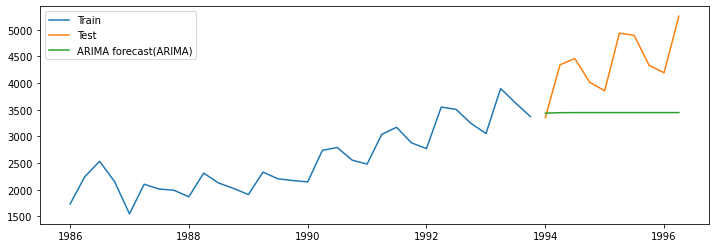

In [561]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_ARIMA['ARIMA_forecast'][test.index.min():],label="ARIMA forecast(ARIMA)")
plt.legend(loc='best')

In [562]:
rsme_ARIMA=np.sqrt(mean_squared_error(test['Sales'],y_hat_ARIMA['ARIMA_forecast'][test.index.min():])).round(2)
rsme_ARIMA

1060.51

In [563]:
mape_ARIMA=MAPE(test['Sales'],y_hat_ARIMA['ARIMA_forecast'][test.index.min():])
mape_ARIMA

20.30399847504335

In [564]:
Result=Result.append({'Method':'ARIMA Method','RSME':rsme_ARIMA,'MAPE':mape_ARIMA},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\2170362327.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'ARIMA Method','RSME':rsme_ARIMA,'MAPE':mape_ARIMA},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895
7,AR Method,829.87,15.269135
8,MA Method,746.67,13.411273
9,ARMA Method,1105.97,24.793724


# Seasonal Auto Regressive Integrated Moving Average (SARIMA)
Arima with seasonal component added

In [565]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [566]:
# passing only transformed boxcox data without diff as model automatically diff the series
# p=1, d=1 q=1  
model=SARIMAX(train_data_boxcox,order=(1,1,1),seasonal_order=(1,1,1,12))


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [567]:
model_fit=model.fit()
model_fit.params

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ar.L1       0.784482
ma.L1      -0.981645
ar.S.L12   -0.326147
ma.S.L12   -0.091433
sigma2      0.008190
dtype: float64

In [568]:
y_hat_SARIMA=df_boxcox_diff.copy()

In [572]:
y_hat_SARIMA['SARIMA_forecast_boxcox']=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_SARIMA['SARIMA_forecast_boxcox'].head()

1986-04-01    7.458663
1986-07-01    7.716443
1986-10-01    7.837477
1987-01-01    7.675529
1987-04-01    7.344602
Freq: QS-OCT, Name: predicted_mean, dtype: float64

# Recocover the original series
SARIMA automatically take care of reverse differencing so need not to take reverse differencing

In [573]:
# remove the boxcox transformation
y_hat_SARIMA['SARIMA_forecast']=np.exp(y_hat_SARIMA['SARIMA_forecast_boxcox'])
y_hat_SARIMA['SARIMA_forecast']

1986-04-01     1734.826993
1986-07-01     2244.960991
1986-10-01     2533.804986
1987-01-01     2154.962994
1987-04-01     1547.818995
1987-07-01     2104.411993
1987-10-01     2014.362998
1988-01-01     1991.746998
1988-04-01     1869.050000
1988-07-01     2313.631998
1988-10-01     2128.320003
1989-01-01    84419.970716
1989-04-01     2472.426061
1989-07-01     2646.690661
1989-10-01     1922.986763
1990-01-01     1568.349538
1990-04-01     2820.332481
1990-07-01     2561.376381
1990-10-01     2682.567075
1991-01-01     2361.258005
1991-04-01     3016.879104
1991-07-01     2758.258678
1991-10-01     2940.304607
1992-01-01     2671.955360
1992-04-01     3397.185224
1992-07-01     3530.494757
1992-10-01     3206.306781
1993-01-01     2779.474834
1993-04-01     3896.950372
1993-07-01     3797.811928
1993-10-01     3397.467547
1994-01-01     3212.514906
1994-04-01     3936.212270
1994-07-01     3892.776719
1994-10-01     3594.593226
1995-01-01     3427.005707
1995-04-01     4303.116785
1

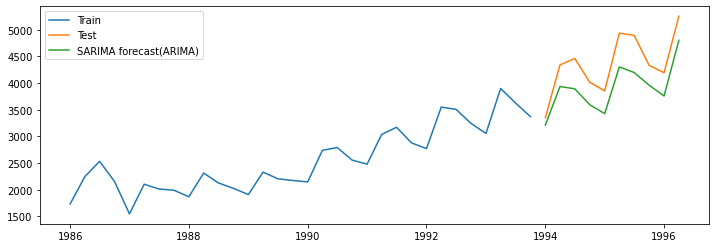

In [574]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_SARIMA['SARIMA_forecast'][test.index.min():],label="SARIMA forecast(ARIMA)")
plt.legend(loc='best')

In [575]:
rsme_SARIMA=np.sqrt(mean_squared_error(test['Sales'],y_hat_SARIMA['SARIMA_forecast'][test.index.min():])).round(2)
rsme_SARIMA

477.95

In [576]:
mape_SARIMA=MAPE(test['Sales'],y_hat_SARIMA['SARIMA_forecast'][test.index.min():])
mape_SARIMA

10.243071420664652

In [577]:
Result=Result.append({'Method':'SARIMA Method','RSME':rsme_SARIMA,'MAPE':mape_SARIMA},ignore_index=True)
Result

C:\Users\hp\AppData\Local\Temp\ipykernel_13152\3430110850.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Result=Result.append({'Method':'SARIMA Method','RSME':rsme_SARIMA,'MAPE':mape_SARIMA},ignore_index=True)


,Method,RSME,MAPE
0,Naive Method,1125.11,21.612343
1,Simple Average Method,1874.72,40.261429
2,Moving Average Method,735.61,13.157210
3,Simple Expo Smoothing Method,1172.41,22.730302
4,Holt Expo Smoothing Method,1072.11,20.506214
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895
7,AR Method,829.87,15.269135
8,MA Method,746.67,13.411273
9,ARMA Method,1105.97,24.793724


In [581]:
Result.sort_values('MAPE',inplace=True)
Result

,Method,RSME,MAPE
11,SARIMA Method,477.95,10.243071
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895
2,Moving Average Method,735.61,13.157210
8,MA Method,746.67,13.411273
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
7,AR Method,829.87,15.269135
10,ARIMA Method,1060.51,20.303998
4,Holt Expo Smoothing Method,1072.11,20.506214
0,Naive Method,1125.11,21.612343
3,Simple Expo Smoothing Method,1172.41,22.730302


In [596]:
f,ax=plt.subplots(1,1,figsize=(18,15),dpi=500)
sns.barplot(x='MAPE',y='Method',data=Result,ax=ax)
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')

for i, v in enumerate(np.round(Result.MAPE.values,0)):
    ax.text(v+1,i+.20,str(v),color='black',fontsize=15,fontweight='bold')
plt.show()

In [598]:
Result.sort_values('RSME',inplace=True)
Result

,Method,RSME,MAPE
11,SARIMA Method,477.95,10.243071
6,Holt winter Multiplicative Expo Smoothing Method,604.48,12.723895
5,Holt winter additive Expo Smoothing Method,693.52,13.782174
2,Moving Average Method,735.61,13.157210
8,MA Method,746.67,13.411273
7,AR Method,829.87,15.269135
10,ARIMA Method,1060.51,20.303998
4,Holt Expo Smoothing Method,1072.11,20.506214
9,ARMA Method,1105.97,24.793724
0,Naive Method,1125.11,21.612343


In [600]:
f,ax=plt.subplots(1,1,figsize=(18,15),dpi=500)
sns.barplot(x='RSME',y='Method',data=Result,ax=ax)
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')

for i, v in enumerate(np.round(Result.RSME.values,0)):
    ax.text(v+1,i+.20,str(v),color='black',fontsize=15,fontweight='bold')
plt.show()

# Sarima model perform best among all model